# **Tsimis Yarn?**: Identifying Fake News Among the News Articles Online

## **Introduction**
In the age of digital media and information, false information, especially, fake news can now be easily disseminated across the globe. The potential damage that could be inflicted by fake news can be serious as news could travel more quickly now through social media platform, especially sensational stories that disinformation producers often manipulate to sell fake news (Siar, 2021). The consequences of dissemination of fake news could go far and wide as **disseminating misleading or fabricated news articles can have significant impact on public opinion, social discourse, and even democratic processes**. 

A new Pulse Asia survey revealed that about <u>9 out of 10 Filipino adults perceive the widespread dissemination of “fake news” as a problem</u> within the country (Lalu, 2022). According to another poll, **58% of Filipinos view social media influencers, bloggers and vloggers** as peddlers of fake news about government and politics, followed by **journalists at 40%**, **national politicians at 37%** and **local politicians at 30%** (Gregorio, 2022). This underscores the continued <u>threat to Philippine press freedom</u> posed by disinformation and fake news that persistently spread and mislead the people, especially Filipinos (Casayuran, 2023).

Now, this project is rooted from the urgent need to address the widespread dissemination of fake news in today’s society, especially in the Philippines. As there is evidently a need for effective tools and techniques to identify and combat fake news, this project will focus on creating a model for fake news detection. In this project, **classification and clustering algorithms** would be applied for building the detection model. Through these algorithms, **differentiating fake news from real news** will be performed by the model and utilize this as its <u>knowledge to identify fake news</u> in online texts.

By developing and implementing reliable fake news detection algorithms, we can **empower individuals, social media platforms, press media freedom, and news organizations to identify and combat misinformation effectively**. 

## **Authors:**
- Banzon, Beatrice Elaine B.
- Buitre, Cameron
- Marcelo, Andrea Jean C.
- Navarro, Alyssa Riantha R.
- Vicente, Francheska Josefa

# Imports and Requirements

## `Basic` Libraries

- [`numpy`](https://numpy.org) contains a large collection of mathematical functions
- [`pandas`](https://pandas.pydata.org) contains functions that are designed for data manipulation and data analysis

In [954]:
import numpy as np
import pandas as pd

## `Visualization` Libraries

- [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/afm_api.html) contains functions to create interactive plots
- [`seaborn`](https://seaborn.pydata.org/index.html) is a library based on matplotlib that allows for data visualization
- [`spacy`](https://spacy.io) is a Python-based open-source library used in processing text data.
- [`wordcloud`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains functions for generating wordclouds from text data

In [955]:
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS

## [`Natural Language Processing`](https://www.nltk.org/index.html) Libraries

- [`re`](https://www.nltk.org/api/nltk.chunk.regexp.html?highlight=import+re) is a module that allows the use of regular expressions
- [`nltk`](https://www.nltk.org/install.html?highlight=import+re) contains various tools and modules for natural language processing.
- [`stopwords`](https://www.nltk.org/howto/corpus.html?highlight=stopwords)  is a corpus from NLTK, which contains common words that are often removed during text processing as they don't carry significant meaning
- [`words`](https://www.nltk.org/howto/corpus.html?highlight=words) is a corpus from NLTK which contains English words that are often used for identifying English texts
- [`WordNetLemmatizer()`](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnetlemmatizer) is used for word lemmatization (converting words to their base or dictionary form).
- [`RegexpTokenizer`](https://www.nltk.org/api/nltk.tokenize.regexp.html) class from nltk, which is used for tokenizing text based on regular expressions.
- [`wordpunct_tokenize`](https://www.nltk.org/api/nltk.tokenize.wordpunct_tokenize.html?highlight=wordpunct_tokenize#nltk.tokenize.wordpunct_tokenize) function from nltk, which is used for tokenizing text into words.
- [`FreqDist`](https://www.nltk.org/api/nltk.probability.FreqDist.html?highlight=freqdist)[`FreqDist class`] from nltk.probability, which is used to compute the frequency distribution of words in a text.
- [`SentimentIntensityAnalyzer`](https://www.nltk.org/api/nltk.sentiment.SentimentIntensityAnalyzer.html?highlight=sentimentintensityanalyzer#nltk.sentiment.SentimentIntensityAnalyzer) class from nltk.sentiment, which is used for sentiment analysis of text.
-  [`ngrams`](https://www.nltk.org/api/nltk.util.html?highlight=ngrams#nltk.util.ngrams)function from nltk, which is used for generating n-grams (contiguous sequences of n words) from text.

In [956]:
import re
import nltk
from nltk.corpus import stopwords
# Load the English words corpus from NLTK
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import wordpunct_tokenize
from nltk import download, classify, corpus
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import ngrams

In [957]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajmarcelo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ajmarcelo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ajmarcelo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ajmarcelo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ajmarcelo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/ajmarcelo/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [958]:
from collections import Counter
import string

In [959]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

## `News Dataset` Files
The following **`.csv`** files will be used in this project:
### Retrieved from <u>Web Scraping</u>
- `rap_dataframe.csv` - this contains the articles scraped form the **Rappler** website. The following are its columns: <u>article content</u>, <u>author</u>, and <u>link</u>.
- `gma_dataframe.csv` and `gma-10000.csv` - these contain the content of the <u>article content</u>, <u>author</u>, and <u>link</u> that is scraped from the **GMA website**.
- `fake news dataset.csv`- This handles the articles that were retrieved from web scraping fake news sites, **Ako'y Pilipino** and **Maharlika News**. This contains two columns wherein one represents the article <u>Content</u> and the other represents its <u>label</u> (0 or 1).
### Retrieved from <u>Kaggle</u>
- `fake_or_real_news.csv` - this data is retrieved from **[Fake or Real News](https://www.kaggle.com/datasets/jillanisofttech/fake-or-real-news)** in **Kaggle** which contains the following column: article <u>number</u>,<u>title</u>, <u>text</u> (represents content), and <u>label</u> (REAL or FAKE).

# Data Preprocessing
<u>**`Importing Dataset`</u>**<br>
After importing all the necessary libraries that we would need, we will now **import the different `.csv` files** we retrieved from different sources into the notebook using the [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

To add, the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head) function will also be used to check the <u>first few rows</u> of the each imported data. This will let us have a glance on the **features of each dataset** and what **type of data each feature** has.

<u>**`Dataset Description`</u>**<br>
Also, to get to know more about each dataset the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) function will be used. This function provides information about a DataFrame including the  shape, data type of each columns, non-null values count, and memory usage.

<u>**`Fixing The Imported Dataset Structure for Data Combination`**</u><br>
After this, we will be <u>fixing each dataset format</u> before combining all of the news data together in one dataset. While formatting the imported datasets, we aim to get the content of each collected article for the data combination later on. With this,we will have to attach a `label` column to these datasets. The `label` will become the indicator of each article whether the article is real or fake news.

<u>**`Outcome of Data Preprocessing`**</u><br>
Finishing this section will result to a dataset with two columns: `label` and `Content`. 
> The `Content` column which contains all of the **article content** from the collected data, **both** fake and real news. 

> The `label` column which contains the article label **"0" to signify real** news and **"1" to represent fake** news. This column will let us identify the article type of each data despite being combined in one dataset.

## **`Real News`** Data
For our **real news data**, we have scraped <u>two sets of news data</u>. One set is from the **[`Rappler`](https://www.rappler.com/)** website and the other is from the **[`GMA News`](https://www.gmanetwork.com/news/topstories/)** website.

### **`Rappler`** Data

First, we will be loading the Rappler news (**`rap_dataframe.csv`**) data using the [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and store it into a DataFrame named `df_Rappler`.

In [960]:
# `df_Rappler` : contains the collected real news data from Rappler

df_Rappler = pd.read_csv('data/rap_dataframe.csv')
df_Rappler.head()

,Link,Author,Content
0,https://www.rappler.com/life-and-style/literat...,[],"MANILA, Philippines – Finally! Best-selling Ja..."
1,https://www.rappler.com/nation/new-findings-ki...,['JAIRO BOLLEDO'],"MANILA, Philippines – The results of the lates..."
2,https://www.rappler.com/sports/football/tom-br...,[],Tom Brady was the ultimate winner on the field...
3,https://www.rappler.com/life-and-style/health-...,[],It’s one thing to know what makes people happy...
4,https://www.rappler.com/entertainment/music/ju...,[],Justin Bieber is the latest artist in a growin...


#### Dataset Description

Using the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), let us view the description of the Rappler data.

In [961]:
# `df_Rappler` : contains the collected real news data from Rappler

df_Rappler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Link     1202 non-null   object
 1   Author   1202 non-null   object
 2   Content  1201 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB


From this, we can see that there are **1202 articles (rows)** and **3 columns** for this dataset. However, there is a *one null value* in the `Content` column as the output states that the column has <u>1201 non-null values out of 1202 articles</u>.

#### Fixing the Dataset Structure

##### **`Dropping Columns`**
As seen in the output above, the Rappler data has 3 columns: `Link`, `Author`, `Content`. Since we will only be needing the `Content` column of this dataset, which represents each article's content, we will only be retrieving this column. With this, we will use the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop) to drop the `Link` and `Author` columns.

In [962]:
# `df_Rappler` : contains the collected real news data from Rappler

# Drops the `Link` and `Author` columns to only have the Content column of the Rappler Data 
df_Rappler.drop(["Link", "Author"], axis=1, inplace=True)

df_Rappler

,Content
0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,"MANILA, Philippines – The results of the lates..."
2,Tom Brady was the ultimate winner on the field...
3,It’s one thing to know what makes people happy...
4,Justin Bieber is the latest artist in a growin...
...,...
1197,"MANILA, Philippines – Thai businesswoman and C..."
1198,"BEIJING, China – Luggage-laden passengers floc..."
1199,Kawhi Leonard and Terance Mann each eclipsed 3...
1200,Nikola Vucevic continued his recent dominance ...


##### **`Adding the "label" Column`**
After retrieving only the `Content` column, we will now attach a `label` column **set each row to `0`** since all of the collected data from Rappler are real news. To recall, in this project, a `0` value in `label` column means it is a real news.

In [963]:
# `df_Rappler` : contains the collected real news data from Rappler

# Adding a label column to the new dataframe
df_Rappler['label'] = 0

df_Rappler

,Content,label
0,"MANILA, Philippines – Finally! Best-selling Ja...",0
1,"MANILA, Philippines – The results of the lates...",0
2,Tom Brady was the ultimate winner on the field...,0
3,It’s one thing to know what makes people happy...,0
4,Justin Bieber is the latest artist in a growin...,0
...,...,...
1197,"MANILA, Philippines – Thai businesswoman and C...",0
1198,"BEIJING, China – Luggage-laden passengers floc...",0
1199,Kawhi Leonard and Terance Mann each eclipsed 3...,0
1200,Nikola Vucevic continued his recent dominance ...,0


##### **`Rearranging Columns`**
Next, let us rearrange the columns wherein the `label` column is the first column of the dataset. This is to give way for other article data that could be added to the dataset in the future.

In [964]:
# `df_Rappler` : contains the collected real news data from Rappler
df_Rappler = df_Rappler[['label', 'Content']]

df_Rappler

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
1197,0,"MANILA, Philippines – Thai businesswoman and C..."
1198,0,"BEIJING, China – Luggage-laden passengers floc..."
1199,0,Kawhi Leonard and Terance Mann each eclipsed 3...
1200,0,Nikola Vucevic continued his recent dominance ...


Now that the Rappler news data has the `Content` and the `label` columns only and is in order, we can now recheck the updated dataset description for the Rappler data.

#### Final Dataset Description
After fixing the Rappler dataset, let us check its updated dataset information through [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). 

This is to also check if there are any null values on the `label`. If there is a null value under the `label` column, this will be automatically filled up by a `0` value to indicate that its equivalent article content is a real news. This is possible since the news from Rappler are all real news data.


However, if the null values are only found in `Content` this will be not be removed for now and will be dropped later on once the combined real and fake news data will undergo data cleaning. This is to drop all article rows with null `Content` values all in one go.

In [965]:
df_Rappler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1202 non-null   int64 
 1   Content  1201 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


Now that we know that there are no null values under the `label` column of the Rappler data, we can now proceed to importing the next data.

### **`GMA News`** Data

For our GMA Data, we scraped two data. These two data (**`gma_dataframe.csv`** and **`gma-10000.csv`**)will also be loaded using the [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html), and stored into two separate DataFrames that we will be naming `df_gma1` and `df_gma2`. 

After this, we will concatenate the two GMA datasets and will be stored into a dataframe named `df_GMA`.

Let us first import the data from **`gma-10000.csv`** and store it to `df_gma1`.

In [966]:
# `df_gma1` : contains the GMA news data from gma-10000.csv

df_gma1 = pd.read_csv('data/gma-10000.csv')
df_gma1.head()

,Unnamed: 0,Link,Author,Content
0,0,https://www.gmanetwork.com/news/balitambayan/p...,[],Arestado ng Laguna Police ang isang elementary...
1,1,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],A barangay kagawad was shot dead in front of b...
2,2,https://www.gmanetwork.com/news/topstories/wor...,[],"GENEVA, Switzerland - Taliban restrictions on ..."
3,3,https://www.gmanetwork.com/news/topstories/nat...,['By GMA Integrated News'],The National Privacy Commission (NPC) has issu...
4,4,https://www.gmanetwork.com/news/topstories/wor...,[],"STOCKHOLM, Sweden - More than 600 young people..."


Next, let's import the data from **`gma_dataframe.csv`** and store it to `df_gma2`.

In [967]:
# `df_gma2` : contains the GMA news data from gma_dataframe.csv

df_gma2 = pd.read_csv('data/gma_dataframe.csv')
df_gma2.head()

,Link,Author,Content
0,https://www.gmanetwork.com/news/topstories/wor...,[],BEIJING - China lashed out at the United State...
1,https://www.gmanetwork.com/news/topstories/met...,['By GMA Integrated News'],"Two people were arrested in Tondo, Manila for ..."
2,https://www.gmanetwork.com/news/topstories/nat...,"['By JOVILAND RITA, GMA Integrated News']",Former Bureau of Corrections (BuCor) chief Ger...
3,https://www.gmanetwork.com/news/balitambayan/b...,[],"Dalawa katao ang arestado sa Tondo, Maynila da..."
4,https://www.gmanetwork.com/news/balitambayan/p...,[],"NEW YORK CITY — Nasa 9,000 nurse na nagtatraba..."


#### Combining the Two GMA Datasets
After loading and storing it into two separate DataFrames, we will now be merging the two GMA news data together into one single DataFrame. 

Since both `df_gma1` and `df_gma2` have the same columns, we can combine the two datasets right away using [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html?highlight=concat#pandas.concat).

In [968]:
# `df_GMA` : contians the combined GMA news data
 
df_GMA = pd.concat([df_gma1,df_gma2], ignore_index=True)
df_GMA.head()

,Unnamed: 0,Link,Author,Content
0,0.0,https://www.gmanetwork.com/news/balitambayan/p...,[],Arestado ng Laguna Police ang isang elementary...
1,1.0,https://www.gmanetwork.com/news/topstories/reg...,['By GMA Integrated News'],A barangay kagawad was shot dead in front of b...
2,2.0,https://www.gmanetwork.com/news/topstories/wor...,[],"GENEVA, Switzerland - Taliban restrictions on ..."
3,3.0,https://www.gmanetwork.com/news/topstories/nat...,['By GMA Integrated News'],The National Privacy Commission (NPC) has issu...
4,4.0,https://www.gmanetwork.com/news/topstories/wor...,[],"STOCKHOLM, Sweden - More than 600 young people..."


#### Dataset Description


Now, let us view the description of the Rappler data using the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [969]:
# `df_GMA` : contians the combined GMA news data

df_GMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16006 entries, 0 to 16005
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9785 non-null   float64
 1   Link        16006 non-null  object 
 2   Author      16006 non-null  object 
 3   Content     16006 non-null  object 
dtypes: float64(1), object(3)
memory usage: 500.3+ KB


From this, we can see that there are **16006 articles (rows)** and **4 columns** for this dataset. Null values were present in one of the columns named `Unamed: 0` as stated from the output above.

#### Fixing the Dataset Structure
##### **`Dropping Columns`**
Next, similar to the processing of Rappler data, we will only be retrieving the `Content` column from the dataset which would be done through dropping the rest of the columns using the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop). This will be the new value of the `df_GMA`.

In [970]:
# `df_GMA` : contains the collected real news data from GMA News

# Only retrieving the Content column of the GMA News Data
df_GMA.drop(["Unnamed: 0", "Link", "Author"], axis=1, inplace=True)

df_GMA

,Content
0,Arestado ng Laguna Police ang isang elementary...
1,A barangay kagawad was shot dead in front of b...
2,"GENEVA, Switzerland - Taliban restrictions on ..."
3,The National Privacy Commission (NPC) has issu...
4,"STOCKHOLM, Sweden - More than 600 young people..."
...,...
16001,SEOUL - North Korea said on Sunday it had test...
16002,Former US President Jimmy Carter has decided t...
16003,The search for the Cessna plane which went mis...
16004,The search and rescue operations for the missi...


##### **`Adding the "label" Column`**
From this, we will now concatenate the `label` column with zero values in all rows since the GMA News data contains real news data.

In [971]:
# `df_GMA` : contains the collected real news data from GMA News

# Only retrieving the Content column of the GMA News Data and declaring it as a new dataframe
df_GMA['label'] = 0

df_GMA

,Content,label
0,Arestado ng Laguna Police ang isang elementary...,0
1,A barangay kagawad was shot dead in front of b...,0
2,"GENEVA, Switzerland - Taliban restrictions on ...",0
3,The National Privacy Commission (NPC) has issu...,0
4,"STOCKHOLM, Sweden - More than 600 young people...",0
...,...,...
16001,SEOUL - North Korea said on Sunday it had test...,0
16002,Former US President Jimmy Carter has decided t...,0
16003,The search for the Cessna plane which went mis...,0
16004,The search and rescue operations for the missi...,0


##### **`Rearranging Columns`**
Lastly, we will rearrange the columns once again where the `label` column is the first column of the dataset.

In [972]:
# `df_GMA` : contains the collected real news data from GMA News

# rearranging the order of columns
df_GMA = df_GMA[['label', 'Content']]

df_GMA

,label,Content
0,0,Arestado ng Laguna Police ang isang elementary...
1,0,A barangay kagawad was shot dead in front of b...
2,0,"GENEVA, Switzerland - Taliban restrictions on ..."
3,0,The National Privacy Commission (NPC) has issu...
4,0,"STOCKHOLM, Sweden - More than 600 young people..."
...,...,...
16001,0,SEOUL - North Korea said on Sunday it had test...
16002,0,Former US President Jimmy Carter has decided t...
16003,0,The search for the Cessna plane which went mis...
16004,0,The search and rescue operations for the missi...


Now that the GMA news data has the `label` and  `Content` columns only and in are correct order, we can now recheck the updated dataset description for the GMA News data.

#### Final Dataset Description
After fixing the dataset, we will now check its updated dataset information through [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). 

This is to also check if there are any null values on the `label`. If there is a null value under the `label` column, this will be automatically filled up by a `0` value to indicate that its equivalent article content is a real news. This is possible since the news from Rappler are all real news data.

However, if the null values are only found in `Content` this will be not be removed for now and will be dropped later on once the combined real and fake news data will undergo data cleaning. This is to drop all article rows with null `Content` values all in one go.

In [973]:
df_GMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16006 entries, 0 to 16005
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    16006 non-null  int64 
 1   Content  16006 non-null  object
dtypes: int64(1), object(1)
memory usage: 250.2+ KB


Now that we know that there are no null values on both columns of the GMA data, let us now proceed to importing the next data, the fake news data.

## **`Real and Fake News`** Data
It is important to note that the fake news data to be used in the project will be from the datasets to be processed under this section. However, we will still use the real news data from these datasets.

### `HuggingFace` Data
Just like what we did in our real news data, we will also load the real and fake news dataset (**`fake news dataset.csv`**) retrieved from one of the [`HuggingFace datasets`](https://huggingface.co/datasets/fake_news_filipino) using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). We will store the imported data to `df_HuggingFace`.

In [974]:
# `df_HuggingFace` : contains the collected real and fake news data from a HuggingFace dataset

df_HuggingFace = pd.read_csv('data/fake news dataset.csv')
df_HuggingFace.head()

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


#### Dataset Description

To see more about the HuggingFace real and fake news data, let us view the information of the dataset by using [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) .

In [975]:
df_HuggingFace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3206 non-null   int64 
 1   article  3206 non-null   object
dtypes: int64(1), object(1)
memory usage: 50.2+ KB


From the output above, the dataset has **3206 articles** and **2 columns**. Moreover, no null values were present in the dataset as the ouput above indicates that <u>both columns have 3206 non-null values out of the 3206 rows</u>.

In this case, we don't have to add or drop any columns since the only columns that the dataset has is the `label` and the `article`, representing the article content. These columns are exactly what we need later for data combination.


#### Fixing the Dataset Structure
Howver, seeing that the name of the column that represents the article content data is named as `article`. We will have to rename the column to `Content` to follow the dataset structure for the data combination later on. 

##### **`Renaming "article" Column`**
Now, we will be renaming the `article` column to `Content` using the [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename), so that it would also match the column name of the real news data we processed previously.

In [976]:
# `df_HuggingFace` : contains the collected real and fake news data from a HuggingFace dataset

# renames the 'article' column to 'Content'
df_HuggingFace.rename(columns={'article': 'Content'}, inplace=True) #renamed column
df_HuggingFace

,label,Content
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...
...,...,...
3201,1,Hindi pa nai-enjoy ni Giacomo Filibeck ang Pil...
3202,1,"Sa isang pahayag, binatikos ng Liberal Party (..."
3203,1,Panoorin nyo yung reaction video na ito ni Mr....
3204,1,Para sa mga magkakapatid na laging nagtatalo l...


Since this data already has the `label` and  `Content` columns in correct order, the updated dataset description for the HuggingFace data will be checked.

#### Final Dataset Description
After fixing the HuggingFace dataset, let us check its updated dataset information through [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). 

This is to also check if there are any null values on the `label`. Unlike the GMA and Rappler Real news data, if there is a null value under the `label` column, the rows involved will be automatically dropped since both fake and real news data are present in this dataset. Filling up the null `label` values will not be possible since the news from HuggingFace data are a mix of real and fake news data. Therefore, if the `label` value of a row is null regardless of the value of its responding `Content` data, there will be no indicator if the article content is real or fake.  

However, if the null values are only found in `Content` this will be not be removed for now and will be dropped later on once the combined real and fake news data will undergo data cleaning. This is to drop all article rows with null `Content` values all in one go.

In [977]:
df_HuggingFace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3206 entries, 0 to 3205
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3206 non-null   int64 
 1   Content  3206 non-null   object
dtypes: int64(1), object(1)
memory usage: 50.2+ KB


Now that we know that there are no null values present in any of the columns in the HuggingFace data, we will now proceed to importing another real and fake news dataset, this time, from Kaggle.

### `Kaggle` Data
Similar to HuggingFace data, we will also load the real and fake news dataset (**`fake_or_real_news.csv`**) we retrieved from [`Kaggle`](https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification) through using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). This data will be stored to `df_Kaggle`.

In [978]:
# `df_Kaggle` : contains the collected real and fake news data from Kaggle

df_Kaggle = pd.read_csv('data/fake_or_real_news.csv')
df_Kaggle.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Dataset Description

Getitng to know the Kaggle real and fake news data, let'ss view the dataset information through the use of [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [979]:
# `df_Kaggle` : contains the collected real and fake news data from Kaggle

df_Kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


From the output above, the dataset has **6335 articles** and **4 columns**. To add, as seen from the output above, there are no null values present in the dataset as the output indicates that <u>all columns have 6335 non-null values out of the 6335 rows</u>.

#### Fixing the Dataset Structure
Howver, seeing that the name of the column that represents the article content data is named as `text` in this dataset. We will have to rename the column to `Content` to follow the dataset structure for the data combination later on. 

##### **`Renaming "text" Column`**
Now, let's rename the `article` column to `Content` using the [`rename()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html?highlight=rename#pandas.DataFrame.rename), so that it would also match the column name of the content news data we have processed so far.

In [980]:
# `df_Kaggle` : contains the collected real and fake news data from Kaggle

# renames the 'text' column to 'Content'
df_Kaggle.rename(columns={'text': 'Content'}, inplace=True)
df_Kaggle

,Unnamed: 0,title,Content,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


##### **`Dropping and Rearranging Columns`**
Similar to the datasets we have processed so far, we will only be retrieving the `Content` and `label` columns from the dataset. This will be the new value of the `df_Kaggle`. 

To drop other unnecessary columns, <u>another way to drop columns is to **only specify the columns we need** in any order</u>. With this, let us also specify the columns in the order that we want ([`label`, `Content`]).

In [981]:
# `df_Kaggle` : contains the collected real and fake news data from Kaggle

# Only retrieving the label and Content Column of the Kaggle Data 
# while specifying that the label is the first column
df_Kaggle = df_Kaggle[['label', 'Content']]

df_Kaggle

,label,Content
0,FAKE,"Daniel Greenfield, a Shillman Journalism Fello..."
1,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,REAL,U.S. Secretary of State John F. Kerry said Mon...
3,FAKE,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,REAL,It's primary day in New York and front-runners...
...,...,...
6330,REAL,The State Department told the Republican Natio...
6331,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,FAKE,Anti-Trump Protesters Are Tools of the Oligar...
6333,REAL,"ADDIS ABABA, Ethiopia —President Obama convene..."


##### **`Checking the "label" values`**
As seen from the output above the values under the `label` columns are not limited to `0` or `1`. Let us check the other unique values under the `label` column through using [`unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html).

In [982]:
# `df_Kaggle` : contains the collected real and fake news data from Kaggle

df_Kaggle['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

From the output above, the values present in the `label` column are only "FAKE" and "REAL". This case is diffrent from the `label` columns from other datasets we have processed so far where their `label` values are *"0" to indicate real news* and *"1" to indicate fake news*. 

##### **`Replacing "label" values`**
The **'label'** column of the Kaggle data doesn't have the numerical value. With that, we will have to **replace these values from <u>"FAKE" and "REAL"</u> to <u>"1" and "0"</u>**, respectively, using the [`replace()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace).

In [983]:
# `df_Kaggle` : contains the collected real and fake news data from Kaggle

# assigning new values (raplacing the existing values 'REAL' and 'FAKE' with 0 and 1, respectively in the 'label' column)
df_Kaggle['label'] = df_Kaggle['label'].replace({'REAL': 0, 'FAKE': 1})
df_Kaggle

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_1717/469766645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Kaggle['label'] = df_Kaggle['label'].replace({'REAL': 0, 'FAKE': 1})


,label,Content
0,1,"Daniel Greenfield, a Shillman Journalism Fello..."
1,1,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,0,U.S. Secretary of State John F. Kerry said Mon...
3,1,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,0,It's primary day in New York and front-runners...
...,...,...
6330,0,The State Department told the Republican Natio...
6331,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,1,Anti-Trump Protesters Are Tools of the Oligar...
6333,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Since the Kaggle dataset already has the `label` and  `Content` columns in correct order, we will now check its updated dataset information.

#### Final Dataset Description
Now that the Kaggle dataset is fixed, we will check use the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) to check its updated dataset information. 

This is to also check if there are any null values on the `label`. This case is <u>similar to the HuggingFace dataset</u> which is <u>different from the GMA News and Rappler</u> real news data. In this case, if there is a null value under the `label` column, the rows involved will be automatically dropped since both fake and real news data are present in this dataset. Filling up the null `label` values will not be possible since the news from Kaggle data are a mix of real and fake news data. Therefore, if the `label` value of a row is null regardless of the value of its responding `Content` data, there will be no indicator if the article content is real or fake.  

However, if the null values are only found in `Content` this will be not be removed for now and will be dropped later on once the combined real and fake news data will undergo data cleaning. This is to drop all article rows with null `Content` values all in one go.

In [984]:
df_Kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    6335 non-null   int64 
 1   Content  6335 non-null   object
dtypes: int64(1), object(1)
memory usage: 99.1+ KB


As seen from the output above, there are no null values present in any of the columns in the Kaggle data. Also, since this is the last dataset to be processed, we can now proceed to combining all the processed datasets.

## Combining Real and Fake News Datasets
In this last part of the pre-procesing, all processed datasets will be merged together using [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html?highlight=concat#pandas.concat) into a single DataFrame called `df_News`.

In [985]:
# `df_Rappler` : contains the collected and processed  real news data from Rappler
# `df_GMA` : contians the collected and processed  GMA news data
# `df_HuggingFace` : contains the collected and processed  real and fake news data from a HuggingFace dataset
# `df_Kaggle` : contains the collected and processed  real and fake news data from Kaggle

# `df_News` : contains all of the collected and processed real and fake news data

df_News = pd.concat([df_Rappler, df_GMA, df_HuggingFace, df_Kaggle], ignore_index=True)
df_News.head()

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...


#### Initial Dataset Description of the Combined News Data
Now that there is a combined news dataset, which contains all of the datasets we have collected and recently processed, we will now check the information of the combined dataset with the help of the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). 

This case is <u>similar to the real and fake news datasets</u> we have processed since all of the data we collected are now combined in one dataset. If there is a null value under the `label` column, the rows involved will be automatically dropped since both fake and real news data are present in this dataset. Filling up the null `label` values will not be possible since the news from Kaggle data are a mix of real and fake news data. Therefore, if the `label` value of a row is null regardless of the value of its responding `Content` data, there will be no indicator if the article content is real or fake.  

However, if the null values are only found in `Content` this will be not be removed for now and will be dropped later on once the combined real and fake news data will undergo data cleaning. 

For now, we will use the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) to view the current dataset description of the combined news dataset.

In [986]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26749 entries, 0 to 26748
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    26749 non-null  int64 
 1   Content  26748 non-null  object
dtypes: int64(1), object(1)
memory usage: 418.1+ KB


There are currently **26,749 rows** for the combined news data before the data cleaning. To add, a null value is present under the `Content` column.

Since this is the last part of the data preprocessing, we can now proceed to data cleaning.

# Data Cleaning

## Removing Unwanted Characters or Formatting
Data often contains unwanted characters or formatting that can make it challenging to work with. So, to remove specific characters from a text, we defined a function that would **return a string without \n, \t, \r, and \r\n\r characters**, as well as **backlash characters from the text**. After that, the function would be applied to the `Content` column of the combined news data (`df_News`).

In [987]:
# Cleaning function to remove newline and tab formatting from the text
def remove_newline_tab(text):
    if isinstance(text, str):
        return text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ').replace('\r\n\r', ' ')
    else:
        return text

# Cleaning function to remove backslash formatting from a text    
def remove_backslashes(text):
    if isinstance(text, str):
        return text.replace('\\', '')
    else:
        return text

After that, both `remove_newline_tab` and `remove_backslashes` functions would be applied to the `Content` column of the combined news data `df_News`.

In [988]:
# Applies both remove_newline_tab and remove_backslashes functions to each row oft the 'Content' column
df_News['Content'] = df_News['Content'].apply(remove_newline_tab)
df_News['Content'] = df_News['Content'].apply(remove_backslashes)

# Shows a sample output of a row after applying both functions
print(df_News.loc[0, 'Content'])

MANILA, Philippines – Finally! Best-selling Japanese author Haruki Murakami is will be releasing a new novel – his first in six years – on April 13, 2023. Publisher Shinchosa made the announcement on Wednesday, February 1. Although the title and plot have not been released yet, Shinchosa said that the book will be initially published in Japanese, with translations following later on. There is still no specific date on when the translated versions will be released. The novel will be “1,200 Japanese manuscript pages long,” Shinchosa said, and will cost 2,970 yen. An order link to the physical and e-book copy is already up on the website. This will be Murakami’s latest novel since the release of Killing Commendatore in 2017. Award-winning writer Murakami, 74, is best known domestically and internationally for his magical realist short stories and novels, such as Norwegian Wood (1987), Kafka on the Shore (2002), 1Q84 (2009), and Wind-Up Bird Chronicle (1994), among many others. – Rappler.c

## Removing Web Links or URLs

We also define a function that **remove any web links or URLs** that might be present in the text of the articles.

In [989]:
# Cleaning function to remove links from text
def remove_links(text):
    # Regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    
    # Replace URLs with an empty string
    return re.sub(url_pattern, '', text)

Then, **to remove web links or urls** from the `Content` data, we apply the `remove_links` function to the `Content` column of the combined news data.

In [990]:
# Apply web link or URL cleaning to the 'Content' column 
df_News['Content'] = df_News['Content'].astype(str).apply(remove_links)
df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
26744,0,The State Department told the Republican Natio...
26745,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
26746,1,Anti-Trump Protesters Are Tools of the Oligar...
26747,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


## Removing Images

Finally, we will also define a function that will be **removing any images** that might be embedded in the text of the `Content` column of the combined news data.

In [991]:
# Cleaning function to remove embedded images from article content text
def remove_images(text):
    # Define a regular expression pattern to match base64-encoded strings (images)
    base64_pattern = r"data:image\/(png|jpg|jpeg|gif|bmp);base64,[A-Za-z0-9+/=]+"

    # Use the re.sub() function to replace the base64-encoded strings with an empty string
    cleaned_text = re.sub(base64_pattern, '', text)

    return cleaned_text

Then, we apply the `remove_images` function to the `Content` column to remove the embedded images from its text data.

In [992]:
df_News['Content'] = df_News['Content'].astype(str).apply(remove_images)
df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
26744,0,The State Department told the Republican Natio...
26745,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
26746,1,Anti-Trump Protesters Are Tools of the Oligar...
26747,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Since we are now done with cleaning each `Content` data, we will now <u>check if there are rows with **only white space left**, **null value**, or **duplicated** values</u> because of changes brought by the cleaning of each article content under the `Content` column.

## Dropping Rows with white spaces only

This is to check the rows under the `Content` column of the news data (`df_News`) if there values with white space only. If the `Content` value of a row is found to only have white space, we will drop these rows by only retrieving those that has actual content or non white space data from the original copy of the combined data. Then, we will update the combined news data by storing the data we retrieved to `df_News`, which represents the original combined data.

Now, let us check if there are any rows with white space `Content` value. To do this, we will be using the [`isspace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isspace.html#:~:text=Check%20whether%20all%20characters%20in,element%20of%20the%20Series%2FIndex.) and the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) to count those rows with white space values and those that are not in white space value.

In [993]:
df_News_space_count = pd.Series(df_News['Content']).str.isspace().value_counts()
df_News_space_count

False    26713
True        36
Name: Content, dtype: int64

From output above, it is evident that **36 rows contain a white space value** under its `Content` value. From this, we will be dropping these column and update the original copy of the combined news data through only storing those with actual content. 

The rows with <u>actual content or non white space values</u> are those that resulted to **"False" from using the [`isspace()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isspace.html#:~:text=Check%20whether%20all%20characters%20in,element%20of%20the%20Series%2FIndex.)**.

In [994]:
df_News = df_News[pd.Series(df_News['Content']).str.isspace() == False]
df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
26744,0,The State Department told the Republican Natio...
26745,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
26746,1,Anti-Trump Protesters Are Tools of the Oligar...
26747,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


As seen from the information above, we can confirm that there were whitespace values under the `Content` column since there are 26,713 rows left out of 26749 rows. 

Since we dropped some rows, we will also use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 



In [995]:
# Updating the index of the updated dataframe
df_News = df_News.reset_index(drop=True)

df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
26708,0,The State Department told the Republican Natio...
26709,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
26710,1,Anti-Trump Protesters Are Tools of the Oligar...
26711,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Then, after dropping the white space rows and resetting the index of the updated data, let us view the dataset information once again to confirm the updated non-null counts per column.

In [996]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    26713 non-null  int64 
 1   Content  26713 non-null  object
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


As seen from the output above, the combined news data (`df_News`) now have a total of **26,713 rows** and **2 columns**, which are the `label` and the `Content` columns. To add, the non-null count for both columns are equal to the latest total number of rows of the dataset. This means that, at this point, there are no more rows with null values in any of the columns among the rows of the combined news data (`df_News`). This may be due to dropping the white space only values under the `Content` column. 

However, to ensure that there are no null values left, let us proceed to <u>specifically checking for null values</u>.

## Checking for Null Values

This section is mainly for checking the `Content` column of the news data (`df_News`). A specific row will be dropped using [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna) if its 'Content' is found to be null. This is because the 'Content' column is a crucial aspect of the dataset which contains the actual text or content of the news articles and essential for any text-based analysis, such as sentiment analysis, or natural language processing (NLP). This is also to maintain data integrity and ensure accurate analysis, it is best to drop the row with the null value in the 'Content' column. 

Despite being checked on the preprocessing part of the project, the `label` column will still be checked if there are null values. To ensure that all news data have an indicator whether the article content is fake or real.

In this way, the rest of the dataset remains intact and retains its value for further exploratory data analysis and text-based tasks. The removal of the row with the null value allows us to work with complete and reliable data, which is crucial for obtaining meaningful insights from the dataset.

First, let's check the information of the combined news data (`df_News`) from the preprocessing by using [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [997]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    26713 non-null  int64 
 1   Content  26713 non-null  object
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


As seen from the information above, we can confirm that there are no null values under  both columns since the output indicated that the non-null count for both columns are equal to the total number of rows of the dataset. 

To ensure that there will be no null values left, after the cleaning let us use the [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to drop values with null values under the `Content` column. Since it is still possible that rows may be dropped, we will also use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) after to update the index of the updated dataframe. 

In [998]:
# Dropping the rows with null values under the `Content` column
df_News.dropna(subset=['Content'], inplace=True)

# Updating the index of the updated dataframe
df_News = df_News.reset_index(drop=True)

df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
26708,0,The State Department told the Republican Natio...
26709,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
26710,1,Anti-Trump Protesters Are Tools of the Oligar...
26711,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Then, after dropping the null row and resetting the index ofthe updated data, let us view the dataset information once again to confirm the updated non-null counts per column.

In [999]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    26713 non-null  int64 
 1   Content  26713 non-null  object
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


As seen from the output above, the combined news data (`df_News`) still have a total of **26,713 rows** and **2 columns**, which are the `label` and the `Content` columns. The non-null count for both columns are equal to the total number of rows of the dataset. This means that there are no more rows with null values in any of the columns among the rows of the combined news data (`df_News`).

## Dropping Duplicated Rows
To ensure the quality and accuracy of the data in the analysis, we will also be  removing duplicated rows in the combined dataset using [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html?highlight=drop_duplicates#pandas.DataFrame.drop_duplicates). This so that potential biases or issues can be avoided which may  arise when dealing with duplicated information.

As seen from the result above, the combined news data has **26,713 rows** and **2 columns**. Now, before dropping the duplicates right away, let us first check the number of duplicated rows with the help of the [`duplicated()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html). This is to know the total number of rows to expect after dropping the duplicates.

In [1000]:
df_News[df_News.duplicated()]

,label,Content
568,0,Art by Andoy Edoria
1484,0,Arestado sa entrapment operation sa Masbate an...
1498,0,Nauwi sa krimen ang inuman ng dalawang lalaki ...
1499,0,Nauwi sa krimen ang inuman ng dalawang lalaki ...
1536,0,Voter registration for Barangay and Sanggunian...
...,...,...
26579,0,"During the campaign, Trump had threatened to i..."
26606,1,Email ISIS barbarians used an industrial doug...
26612,1,Email North Korea’s Foreign Ministry slammed ...
26629,0,A verdict in 2017 could have sweeping conseque...


Since the result above shows that there are **3,579 duplicated rows**, we subtract this from the current total number of rows (**26,713 rows**) of the combined news data (`df_News`). From this, we <u>expect the updated combined news data to have 23,134 rows</u> after the dropping of duplicated rows.

Now, let us **drop the duplicated rows** and <u>see the updated shape</u> of the combined news data after the dropping of duplicates. Since some rows will be dropped, we will also use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 

Then, we will use the [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) once again to check the dataset information, especially the total number of rows and the non-null counts per column.

In [1001]:
df_News = df_News.drop_duplicates().reset_index(drop=True)

df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
23129,0,The State Department told the Republican Natio...
23130,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
23131,1,Anti-Trump Protesters Are Tools of the Oligar...
23132,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


In [1002]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    23134 non-null  int64 
 1   Content  23134 non-null  object
dtypes: int64(1), object(1)
memory usage: 361.6+ KB


From the information presented above, the dataset contains **23,134 news articles** and **all rows per column are non-null** values. 

Since this is the last part of the data cleaning process, we will now <u>sort the combined news dataset based on its **language**, and based on its **article type**</u>, if it is real or fake news.

# Separating English and Filipino Articles

The combined news data contains articles **both in the English language and Filipino language**. 

With that, we sort these articles into two datasets: (1) `English articles` and (2) `Filipino articles`. 

To proceed, we use the **Natural Language Toolkit library** for this by importing words from [`nltk.corpus`](https://www.nltk.org/howto/corpus.html?highlight=set+words) that provides a collection of English words which can effeciently check if a particular word belongs to the English language or not. 

With this, let us <u>**retrieve the english words or vocabulary from the NLTK corpus**</u> to be used in **sorting** the combined news articles by its language text.

In [1003]:
# Getting the English vocabulary from the NLTK corpus imported from the first part of the project
english_words = set(words.words())

Next, we formulated a function called `detect_language` that identifies the language of a given text. 

In this function, the text will be tokenized into individual words, converts them to lowercase, and then calculates the count of English and Filipino words in the text. If the <u>text contains **too few words** or is **empty**</u>, it returns **"Unknown"** as there is insufficient information to determine the language. Otherwise, it <u>compares the counts of English and Filipino words</u> and <u>concludes the language to be either **English or Filipino** based on **which count is higher**</u>. 

In [1004]:
# Function to detect the language of a text
def detect_language(text):
    words = wordpunct_tokenize(text.lower())
    if len(words) == 0:
        return 'Unknown'
    
    # Calculate the count of English words in the text
    english_word_count = sum(1 for word in words if word in english_words)
    
    # Calculate the count of Filipino words in the text
    filipino_word_count = sum(1 for word in words if word not in english_words)
    
    # Check if the text contains enough words to determine the language
    if len(words) < 5:
        return 'Unknown'
    
    # Check if the text has more English words than Filipino words
    if english_word_count > filipino_word_count:
        return 'English'  # Language is English
    else:
        return 'Filipino'  # Language is Filipino

Since we will only be needing the `language` column only for sorting the combined news data by its language text, we will not update the original copy of the combined news data (`df_News`). Instead, using the [`copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html), we will make a copy of the combined news data to use only for this part. In this case, we will store the copy of the combined news data to `df_News_Language`.

In [1005]:
df_News_Language = df_News.copy()
df_News_Language

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
23129,0,The State Department told the Republican Natio...
23130,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
23131,1,Anti-Trump Protesters Are Tools of the Oligar...
23132,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Now, the function will be applied to the `Content` column of the combined news data copy (`df_News_Language`). This will create a new column called `language` to the data copy which indicates the detected language (either "*English*," "*Filipino*," or "*Unknown*") for each corresponding text in the `Content` column.

In [1006]:
# Applying the detect_language function to 'Content' column
df_News_Language['language'] = df_News_Language['Content'].apply(detect_language)
df_News_Language

,label,Content,language
0,0,"MANILA, Philippines – Finally! Best-selling Ja...",English
1,0,"MANILA, Philippines – The results of the lates...",English
2,0,Tom Brady was the ultimate winner on the field...,English
3,0,It’s one thing to know what makes people happy...,English
4,0,Justin Bieber is the latest artist in a growin...,English
...,...,...,...
23129,0,The State Department told the Republican Natio...,English
23130,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,English
23131,1,Anti-Trump Protesters Are Tools of the Oligar...,English
23132,0,"ADDIS ABABA, Ethiopia —President Obama convene...",English


After detecting the language of the text in the `Content` column, we will be creating two DataFrames wherein the data will be separated based on the language as indicated in the `language` column. Doing this can be useful **to analyze and understand these two set of news articles separately, by language**.

Before separating the data by language, let us check the **tally per language detected** among the article content data. This is possible with the help of the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [1007]:
df_News_Language['language'].value_counts()

English     17526
Filipino     5603
Unknown         5
Name: language, dtype: int64

And as it turned out from theoutput above, the **English articles has 17,526 rows**, while the **Filipino articles only has 5,603 rows**. Meanwhile, **5 article data were identified as "Unknown"** under the `language` column. This means that there were <u>5 rows that contain too few words or is empty</u> making it insufficient information to detect the language in those rows. 

## Examining Article Data under 'Unknown' language 
Let us examine the rows with "**Unknown**" language.

In [1008]:
df_News[df_News_Language['language'] == 'Unknown']

,label,Content
293,0,Art by Andoy Edoria
935,0,nan
20468,1,Adrian Bamforth Adrian Bamforth
20510,1,Guest Guest
20862,1,RECENT POSTS


From this, we can use that there are **repeating words**, and **at most 4 words length** among the article content data under the **Unknown** language. 

Since this <u>does not make sense as a news article</u>, we can **drop these rows** from the combined news data by excluding these rows and update the original copy of the combined news data. 

Since some rows will be dropped, we will also use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 

In [1009]:
df_News = df_News[df_News_Language['language'] != 'Unknown'].reset_index(drop=True)
df_News

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
23124,0,The State Department told the Republican Natio...
23125,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
23126,1,Anti-Trump Protesters Are Tools of the Oligar...
23127,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Now, there are currently **23,129 rows** for the combined news data. Let us now proceed to separating the article data by its identified language.

## `English` Article Data
To do this, a dataframe called `df_english_news` will be created as the container of the English articles. 

In this section, we will **collect all the news articles written in English from the original copy of the combined news data (`df_News`) and put them in the new DataFrame `df_english_news`**. To know which of the rows from the original combined data will be included, we will use the combined data copy that has the `language` column (`df_News_Language`) to navigate the rows to be included. This specific dataframe would be useful in analyzing the English real and fake news only. 

We will collect English news articles from the original copy of the combined news data (`df_News`) since only want the `label` and `Content` column. To add, the `language` for all rows would have "English" as their value which makes the `language` column irrelevant for this case. 

This procedure will also be done in Filipino articles but not in articles with "Unknown" `language` value.

Since we are specifying only English article data, we will use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 

In [1010]:
df_english_news = df_News[df_News_Language['language'] == 'English'].reset_index(drop=True)
df_english_news

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_1717/2184536250.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_english_news = df_News[df_News_Language['language'] == 'English'].reset_index(drop=True)


,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
17516,0,The State Department told the Republican Natio...
17517,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
17518,1,Anti-Trump Protesters Are Tools of the Oligar...
17519,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


Let us also check the counts of real and fake news from the English article data through using [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [1011]:
df_english_news['label'].value_counts()

0    14367
1     3154
Name: label, dtype: int64

From the output, **14,398 English articles are real** news while **3,128** are English fake news.

## `Filipino` Article Data
To do this, a dataframe called `df_filipino_news` will be created as the container of the Filipino articles. 

In this section, we will **collect all the news articles written in Filipino from the original copy of the combined news data (`df_News`) and put them in the new DataFrame `df_Filipino_news`**. To know which of the rows from the original combined data will be included, we will use the combined data copy that has the `language` column (`df_News_Language`) to navigate the rows to be included. This specific dataframe would be useful in analyzing the Filipino real and fake news only. 

We will collect Filipino news articles from the original copy of the combined news data (`df_News`) since only want the `label` and `Content` column. To add, the `language` for all rows would have "Filipino" as their value which makes the `language` column irrelevant for this case. 

Since we are specifying only Filipino article data, we will use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 

In [1012]:
df_filipino_news = df_News[df_News_Language['language'] == 'Filipino'].reset_index(drop=True)
df_filipino_news

/var/folders/hy/wg_n_hk95j3_bhf9fkykc7d40000gn/T/ipykernel_1717/4102236093.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filipino_news = df_News[df_News_Language['language'] == 'Filipino'].reset_index(drop=True)


,label,Content
0,0,"MANILA, Philippines – Jonathon Simmons carried..."
1,0,"MANILA, Philippines – June Mar Fajardo and Sco..."
2,0,"MANILA, Philippines – Nazareth-NU star guard R..."
3,0,"MANILA, Philippines – San Miguel waxed hot ear..."
4,0,LeBron James moved closer to Kareem Abdul-Jabb...
...,...,...
5598,1,"By 2050, the world’s population is estimated t..."
5599,1,Military British Defense Secretary Michael Fal...
5600,0,With no presidential election or congressional...
5601,1,Republican presidential nominee Donald Trump...


Let us also check the counts of real and fake news from the Filipino article data through using [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [1013]:
df_filipino_news['label'].value_counts()

0    4183
1    1420
Name: label, dtype: int64

From the output, **4,155 Filipino articles are real** news while **1,448** are Filipino fake news.

# Separating Real and Fake News Articles

Of course, the combined news data contains **both real and fake news articles**. 

With that, we sort these articles into two datasets: (1) `Real news articles` and (2) `Fake news articles`. 

In separating the combined news data by the article type (`real or new`), we will **rely on the `label` column** of the combined news data as its values indicate if the article is <u>**fake (`label` value: 1)**</u> or <u>**real (`label` value: 0)**</u>. In this case, unlike the separation process of article data by language, we will be <u>using the original copy of the combined news data</u> since the `label` column is already there to indicate which of the articles are fake or real.

Before separating the data by article type, let us check the **tally per article type** among the combined news data. To do this, we will use the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [1014]:
df_News['label'].value_counts()

0    18553
1     4576
Name: label, dtype: int64

As seen from the output above, the **`0` label or real news articles has 18,555 rows** while the **`1` label or fake news has 4,579 rows**. Meaning, it is evident that <u>there are a lot more real data collected than the fake news data</u>.

## `Real News` Article Data
To do this, a dataframe called `df_real_news` will be created as the container of the real news articles. 

In this section, we will **collect all the real news articles from the original copy of the combined news data (`df_News`) and put them in the new DataFrame `df_real_news`**. To know which of the rows from the original combined data will be included, we will specify that we will **only retrieve those article data that have `label` value equal to "0"**. 

Since we are specifying only real news article data, we will use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 

In [1015]:
# Create a DataFrame for real news (where 'label' is 0)
df_real_news = df_News[df_News['label'] == 0].copy()
df_real_news = df_real_news.reset_index(drop=True)
df_real_news

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...
...,...,...
18548,0,Most conservatives who oppose marriage equalit...
18549,0,The freshman senator from Georgia quoted scrip...
18550,0,The State Department told the Republican Natio...
18551,0,"ADDIS ABABA, Ethiopia —President Obama convene..."


To add, the `label` for <u>all rows would have "0" as their value</u> which will make the `label` column irrelevant for this case. Therefore, we will <u>drop the `label` column</u> in this case.

In [1016]:
df_real_news.drop(['label'], axis=1, inplace=True)

df_real_news

,Content
0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,"MANILA, Philippines – The results of the lates..."
2,Tom Brady was the ultimate winner on the field...
3,It’s one thing to know what makes people happy...
4,Justin Bieber is the latest artist in a growin...
...,...
18548,Most conservatives who oppose marriage equalit...
18549,The freshman senator from Georgia quoted scrip...
18550,The State Department told the Republican Natio...
18551,"ADDIS ABABA, Ethiopia —President Obama convene..."


All of this process will also be done in fake news article data.

## `Fake News` Article Data
To do this, a dataframe called `df_fake_news` will be created as the container of the fake news articles. 

In this section, we will **collect all the fake news articles from the original copy of the combined news data (`df_News`) and put them in the new DataFrame `df_fake_news`**. To know which of the rows from the original combined data will be included, we will specify that we will **only retrieve those article data that have `label` value equal to "1"**. 

Since we are specifying only fake news article data, we will use the [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) to update the index of the updated dataframe. 

In [1017]:
# Create a DataFrame for fake news (where 'label' is 1)
df_fake_news = df_News[df_News['label'] == 1].copy()
df_fake_news = df_fake_news.reset_index(drop=True)

df_fake_news

,label,Content
0,1,Isiniwalat ng isang tribal leader ang kabalbal...
1,1,Kilala ang Univeristy of the Philippines (UP) ...
2,1,Ayon kay Tourism Secretary Bernadette Romulo-P...
3,1,Sa opisyal na pagpapakilala ng mga taga-oposis...
4,1,Hindi pinalampas ni dating Presidential Commun...
...,...,...
4571,1,Written by Peter Van Buren venerable New Yor...
4572,1,DOJ COMPLAINT: Comey Under Fire Over Partisan ...
4573,1,Julian Assange has claimed the Hillary Clinton...
4574,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...


To add, the `label` for <u>all rows would have "0" as their value</u> which will make the `label` column irrelevant for this case. Therefore, we will <u>drop the `label` column</u> in this case.

In [1018]:
df_fake_news.drop(['label'], axis=1, inplace=True)

df_fake_news

,Content
0,Isiniwalat ng isang tribal leader ang kabalbal...
1,Kilala ang Univeristy of the Philippines (UP) ...
2,Ayon kay Tourism Secretary Bernadette Romulo-P...
3,Sa opisyal na pagpapakilala ng mga taga-oposis...
4,Hindi pinalampas ni dating Presidential Commun...
...,...
4571,Written by Peter Van Buren venerable New Yor...
4572,DOJ COMPLAINT: Comey Under Fire Over Partisan ...
4573,Julian Assange has claimed the Hillary Clinton...
4574,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...


# Final Dataset Description of the Combined News Data

By using the [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), let us view the final dataset description of the combined news data.

In [1019]:
dfNews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23129 entries, 0 to 23128
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    23129 non-null  int64 
 1   Content  23129 non-null  object
dtypes: int64(1), object(1)
memory usage: 361.5+ KB


There are **23,129 rows** for the combined news data after the data preprocessing and data cleaning. To add, both columns have no null values anymore as the information stated that the non-null count for both columns are equal to the total number of rows of the latest combined news data.

Since the preprocessing, cleaning, and sorting of data are all done, we will proceed with saving the dataframes and sub-dataframe we have processed and cleaned to `.csv` files.

# Saving of Data to CSV files

With the help of pandas' [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html), we will be exporting copies of the **several dataframes** and **sub dataframes** as CSV files.

In [1020]:
# Saving of Cleaned Combined News Data to CSV file
df_News.to_csv('cleaned_data.csv', index=False)

In [1021]:
#Saving of English News to CSV file
df_english_news.to_csv('english_news.csv', index=False)

In [1022]:
#Saving of Filipino News to CSV file
df_filipino_news.to_csv('filipino_news.csv', index=False)

In [1023]:
#Saving of Real News to CSV file
df_real_news.to_csv('real_news.csv', index=False)

In [1024]:
#Saving of Fake News to CSV file
df_fake_news.to_csv('fake_news.csv', index=False)

# Exploratory Data Analysis (EDA)

## EDA Questions

The following questions that will be used to explore `df_cleaneddata`, which is the combined dataset:

1. Which words occur most frequently in each of the labels?
     - Without any exclusion of words
     - Excluding Stop Words, Fillers, and Blank Spaces
     - Excluding Verbs and Contractions
     - WordCloud using TF-IDF
 
2. What is the range of character counts of the news for each of the labels?
3. What are the sentiment score of the statements per labels?
4. Among the articles written in Filipino and English, which language predominantly contains the most real or fake news labels?

To answer these questions, we used numerical summaries. Additionally, we used visualization techiniques in order to present and illustrate possible relationships in the data.


To start with, we will duplicate the original `df_News` dataframe that holds the merged and cleaned dataset using the [`copy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html). This duplicated dataframe will be referred to as "news" throughout the process.

In [1025]:
news = df_News[['label', 'Content']].copy(deep=True)

Afterward, the news dataframe will be split into two separate dataframes based on their respective labels: one for real instances (label = 0), denoted as "rn," and another for fake instances (label = 1), denoted as "fn."

In [1026]:
rn = news[news['label'] == 0] 
fn = news[news['label'] == 1] 

## 1. Which words occur most frequently in each of the labels?

To find the words that appear most frequently, we will generate separate word clouds for each label. Additionally, we will employ two different methods for creating these word clouds, namely the SpaCy word cloud and a word cloud based on TF-IDF.

### Word Cloud using SpaCy

**SpaCy** is a freely available Python library that is open-source and widely used for different Natural Language Processing (NLP) tasks such as identifying entities, classifying text, and preparing text for analysis.


To begin, we'll merge the Content data within each label by using the [`join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html?highlight=join#pandas.DataFrame.join) function, combining all the contents belonging to the same label. The use of " " as the separator means that the content data within each label will be separated by a whitespace. Additionally, we'll convert all the contents to lowercase using [`lower()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html?highlight=lower#pandas.Series.str.lower) to ensure uniformity in the content's case.

In [1027]:
# Combining the texts from the Real News and separating it by whitespace
text_rn = " ".join(i for i in rn['Content']).lower()

# Combining the texts from the Fake News and separating it by whitespace
text_fn = " ".join(i for i in fn['Content']).lower()

Afterward, we will create [`WorldClouds()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) for each label, utilizing the combined text data for each label obtained in the previous step.

In [1028]:
# Generating a word cloud for Real News by using the combined text data
wordcloud_rn = WordCloud(background_color="white").generate(text_rn)

# Generating a word cloud for Fake News by using the combined text data
wordcloud_fn = WordCloud(background_color="white").generate(text_fn)

The visualization of bot word clouds can now be presented below.

Text(0.5, 1.0, 'FAKE NEWS')

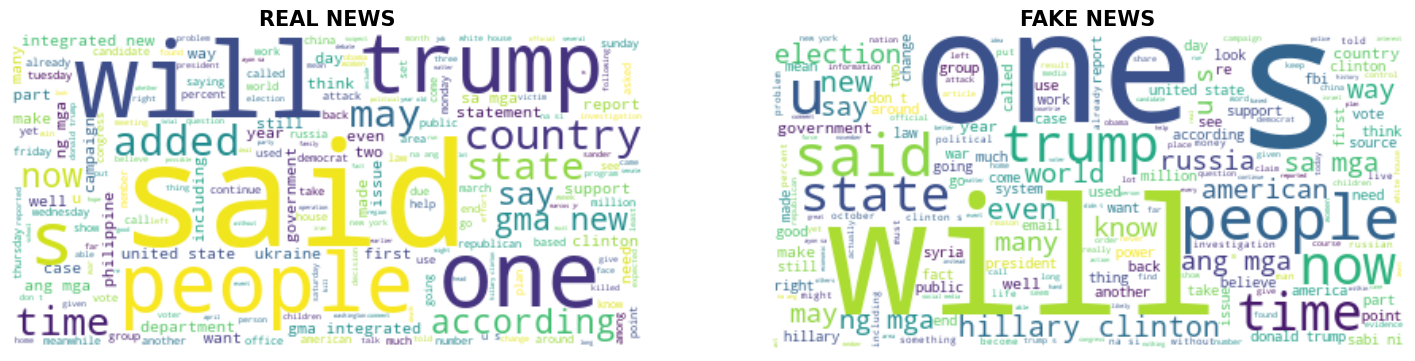

In [1029]:
fig = plt.figure(figsize=(18, 13))
  
rows = 1
columns = 2
  
# Plotting the initial word cloud for REAL NEWS
fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_rn, interpolation='bilinear')
plt.axis('off')
plt.title("REAL NEWS", fontsize=15, weight='bold')

# Plotting the initial word cloud for FAKE NEWS
fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_fn, interpolation='bilinear')
plt.axis('off')
plt.title("FAKE NEWS", fontsize=15, weight='bold')

#### Figure 1. Initial Word Cloud for each label

As observed in the word clouds displayed above, they contain numerous extraneous elements like fillers and blank spaces (' '). To enhance data cleanliness, we will eliminate these fillers and blank spaces. Additionally, we will exclude stop words from the data to ensure that only essential and relevant words are shown.

### Excluding Stop Words, Fillers, and Blank Spaces

We will first retrieve the stop words from SpaCy and merge them with the fillers and blank spaces identified in the initial word clouds. Subsequently, we will instruct the [`WorldClouds()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)  to exclude these specific texts and characters when creating new word clouds for each label.

In [1030]:
sp = spacy.load('en_core_web_sm')

# Accesing the stopwords package from SpaCy
all_stopwords = sp.Defaults.stop_words
# List of the fillers and blank space 
new_stopwords=["filler", " ", "S", "t", "s", "u", " "]
# Combining the stopwords, fillers, and blank space
comb_stopwords=list(new_stopwords)+list(all_stopwords)

# Generating the word clouds
wordcloud_rn = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_rn)
wordcloud_fn = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_fn)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

We will now be generating new word clouds that exclude any texts and characters that we removed in the previous step.

In [ ]:
fig = plt.figure(figsize=(18, 13))
  
rows = 1
columns = 2
# Plotting the initial word cloud for Real News
fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_rn, interpolation='bilinear')
plt.axis('off')
plt.title("REAL NEWS", fontsize=15, weight='bold')

# Plotting the initial word cloud for Fake News
fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_fn, interpolation='bilinear')
plt.axis('off')
plt.title("FAKE NEWS", fontsize=15, weight='bold')

#### Figure 2. Updated Word Cloud for each label (Excluded Stopwords, Fillers, and Blank Spaces)

In the depicted figure, the wordclouds appear more refined. For the real label, the most prominent words are 'said,' 'year,' 'people,' 'country,' 'added,' and 'time,' indicating their high occurrence in this category. On the other hand, for the fake label, words such as 'trump,' 'clinton,' 'state,' 'said,' and 'people' are found to be the most common occurrences.

### Excluding Verbs and Contractions

The next round of word clouds will be created, but this time, we will exclude verbs and contractions from the analysis. To gain more valuable insights from the data, we will treat verbs as stopwords, meaning they will not be included in the word clouds. However, existing libraries do not classify verbs as stopwords by default, so we will manually add them to the current list of stopwords. As a result, the focus will be on nouns, providing a clearer picture for the upcoming word clouds.

In [ ]:
all_stopwords = sp.Defaults.stop_words
new_stopwords_nv=["filler", " ", "S", "t", "s", "u", " ", "added", "believe", "use", "saying", "said", "tell", "help", "run", "work", "says", "come", "told", "like", "know", "asked", "vote", "going", "make", "support", "debate" "sabi", "help", "think", "provide", "▯"]
comb_stopwords=list(new_stopwords_nv)+list(all_stopwords)

# Generating the word clouds
wordcloud_rn_nv = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_rn)
wordcloud_fn_nv = WordCloud(stopwords=comb_stopwords, background_color="white").generate(text_fn)

Next, we are going to generate new visualizations using the updated word clouds.

In [ ]:
fig = plt.figure(figsize=(18, 13))
  
rows = 1
columns = 2
  
fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_rn_nv, interpolation='bilinear')
plt.axis('off')
plt.title("REAL NEWS (mostly noun)", fontsize=15, weight='bold')
  
fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_fn_nv, interpolation='bilinear')
plt.axis('off')
plt.title("FAKE NEWS (mostly noun)", fontsize=15, weight='bold')

#### Figure 3. Latest Word Cloud for each label (Excluded Stopwords, Fillers, Blank Spaces, Verbs, and Contractions)

From the word clouds shown above, it is evident that the real label prominently displays words like 'people', 'country', 'year', 'time', and 'according' in a visually larger size. Conversely, the fake label exhibits larger words such as 'trump', 'clinton', 'state', 'people', and 'year'.

### Word Cloud using TF-IDF

To start, we will be making a copy of the Real News data rn and Fake News fn.

In [ ]:
rn_tf = rn[['Content']].copy(deep=True)
fn_tf = fn[['Content']].copy(deep=True)

#### Lemmatization

We will perform lemmatization using [`WordNetLemmatizer()`](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnetlemmatizer) first before converting the dataset into TF-IDF vectors o ensure that the words are in their base form and reduced to the most essential form. To achieve this, we have developed the clean_text function, which is responsible for cleaning the text and generating a text free from unnecessary noise and unwanted words.

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

rn_tf["text_clean"] = rn_tf["Content"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))
fn_tf["text_clean"] = fn_tf["Content"].apply(lambda s: ' '.join(re.sub(r'\d+', '', s).split()))

def clean_text(input_txt):
    words_rn_tf = input_txt.lower().split()
    words_rn_tf = [word for word in words_rn_tf if word not in stop_words and new_stopwords_nv] 
    words_rn_tf = [lemmatizer.lemmatize(word, pos='v') for word in words_rn_tf]
    words_rn_tf = [word for word in words_rn_tf if len(word) > 2]
    noise_free_text = " ".join(words_rn_tf) 
    return noise_free_text

rn_tf["text_clean"] = rn_tf["text_clean"].apply(lambda s: clean_text(s))


fn_tf["text_clean"] = fn_tf["Content"].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...'@#_]", " ", s).split()))
fn_tf["text_clean"] = fn_tf["Content"].apply(lambda s: ' '.join(re.sub(r'\d+', '', s).split()))

def clean_text_s(input_txt):
    words_fn_tf = input_txt.lower().split()
    words_fn_tf = [word for word in words_fn_tf if word not in stop_words and new_stopwords_nv] 
    words_fn_tf = [lemmatizer.lemmatize(word, pos='v') for word in words_fn_tf]
    words_fn_tf = [word for word in words_fn_tf if len(word) > 2]
    noise_free_text = " ".join(words_fn_tf) 
    return noise_free_text

fn_tf["text_clean"] = fn_tf["text_clean"].apply(lambda s: clean_text(s))

### Vectorization

Once the texts have undergone lemmatization, we proceed to apply the TF-IDF vectorizer on both dataframes. To ensure a concise representation, we set the max_features value to 50, which allows us to select only the top 50 words with the highest TF-IDF scores. This approach helps us focus on the most significant words, making the analysis more efficient and meaningful.

In [ ]:
tfidf_stop_words = list(text.ENGLISH_STOP_WORDS.union(["ll", "gt", "lt", "filler", "don", "ve"]))

# Initialization of TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1), stop_words=tfidf_stop_words, max_features=50)

# Implementing vectorization per label lemmatized data
df_vec_rn = tfidf_vectorizer.fit_transform(rn_tf["text_clean"])
df_vec_fn = tfidf_vectorizer.fit_transform(fn_tf["text_clean"])

After this step, the resulting matrix will be transformed into a dataframe.

In [ ]:
df_rn_tf = pd.DataFrame(df_vec_rn.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_fn_tf = pd.DataFrame(df_vec_fn.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

#### Result data for Real  News label

We can observe the frequency score of each word (from the top 50 words) for every data entry in the real news label.

In [ ]:
df_rn_tf

#### Result data for Fake News label

The same can be observed in the fake news label

In [ ]:
df_fn_tf

Next, we will examine the top 50 words that have been chosen and arrange them based on the overall frequency scores in each data point for each category. We will employ the [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html?highlight=sum#pandas.DataFrame.sum) function to calculate the total occurrence count of each word across all data points within a specific label. Once this is done, we will use the [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values) method to arrange the words in ascending order, based on their total occurrence values.

In [ ]:
tf_idf_counter_rn = df_rn_tf.T.sum(axis=1).sort_values(ascending=False)
tf_idf_counter_fn = df_fn_tf.T.sum(axis=1).sort_values(ascending=False)

#### Ranking words for the real news label

In [ ]:
tf_idf_counter_rn

Here, the top 5 most frequent words in the real label are as follows:

- "tell" with a frequency of 4378.469819
- "campaign" with a frequency of 3806.423478
- "percent" with a frequency of 1723.544565
- "republican" with a frequency of 1202.855044
- "republicans" with a frequency of 1190.927968

#### Ranking words for the fake news label

In [ ]:
tf_idf_counter_fn

On the other hand, the most common words in the fake label are:

- "ang" with a frequency of 1263.425062
- "say" with a frequency of 636.665587
- "mga" with a frequency of 624.349292
- "trump" with a frequency of 573.280842
- "clinton" with a frequency of 388.996185

To create the word cloud using TF-IDF, the [`generate_from_frequencies()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) function is utilized instead of the [`generate()`](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) function. 

In [ ]:
wordcloud_tf_rn = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False).generate_from_frequencies(tf_idf_counter_rn)

wordcloud_tf_fn = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False).generate_from_frequencies(tf_idf_counter_fn)

Having created a word cloud for each label, we can now visualize and compare the differences in word frequency scores between them.

In [ ]:
fig = plt.figure(figsize=(18, 13))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_tf_rn, interpolation='bilinear')
plt.axis("off")
plt.title("REAL NEWS", fontsize=15, weight='bold')

fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_tf_fn, interpolation='bilinear')
plt.axis("off")
plt.title("FAKE NEWS", fontsize=15, weight='bold')

### Figure 4. Word Cloud after TF-IDF

As shown in figure above, it is clear that the top 5 words for the real label are "tell," "campaign," "percent," "republican," and "republicans." Conversely, the top 5 words for the fake label are "ang," "say," "mga," "trump," and "said." 

Nevertheless, relying solely on the word cloud might be misleading as some words appear almost as large as the actual top 5 words in each label. To get a more accurate understanding of the top words in each label, it is advisable to examine the ranking of words based on their frequency scores. This way, we can identify the most significant words in each class more effectively.

## 2. What is the range of character counts of the news for each of the labels?

### REAL NEWS

Firstly, we'll create a duplicate of the dataframe that exclusively includes data from the real label. This duplicate will be referred to as "rn_2."

In [1031]:
rn_2 = rn[['Content']].copy(deep=True)
rn_2

,Content
0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,"MANILA, Philippines – The results of the lates..."
2,Tom Brady was the ultimate winner on the field...
3,It’s one thing to know what makes people happy...
4,Justin Bieber is the latest artist in a growin...
...,...
23119,Most conservatives who oppose marriage equalit...
23122,The freshman senator from Georgia quoted scrip...
23124,The State Department told the Republican Natio...
23127,"ADDIS ABABA, Ethiopia —President Obama convene..."


In the real label, the length of each statement is determined by counting the number of words using the [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.count.html?highlight=count#pandas.Series.str.count) function, and then adding 1 to account for the offset, which gives us the "length" variable. Additionally, the length of each statement is measured by the number of characters using the [`len()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html?highlight=len#pandas.Series.str.len) function to count the characters in each text data, resulting in the "LoR" variable.

Next, the "length" and "LoR" values are placed in separate columns within the rn_2 dataframe for further analysis and comparison.

In [1032]:
rn_2['length'] = rn_2['Content'].str.count(' ') + 1
rn_2['LoR'] = rn_2['Content'].str.len()
rn_2

,Content,length,LoR
0,"MANILA, Philippines – Finally! Best-selling Ja...",161,1002
1,"MANILA, Philippines – The results of the lates...",655,3952
2,Tom Brady was the ultimate winner on the field...,497,2865
3,It’s one thing to know what makes people happy...,839,4858
4,Justin Bieber is the latest artist in a growin...,884,5078
...,...,...,...
23119,Most conservatives who oppose marriage equalit...,293,1822
23122,The freshman senator from Georgia quoted scrip...,376,2212
23124,The State Department told the Republican Natio...,677,4076
23127,"ADDIS ABABA, Ethiopia —President Obama convene...",1145,6991


Afterward, the average length (number of words in a text data) and the average LoR (number of characters in a text data) are computed by using the [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html?highlight=mean#pandas.DataFrame.mean) function.

In [1033]:
rn_2["length"].mean()

437.0260335255754

In [1034]:
rn_2["LoR"].mean()

2661.7013960006466

According to the findings above, the average statement length in the real label is approximately 437 words. Additionally, the average number of characters is approximately 2661 characters per statement.

### FAKE NEWS

Now, we will be doing the same process as what we did in the real label with fake label. The only difference is that we will be making a copy of the dataframe which only contain data under the fake label and will be renamed as fn_2

In [1035]:
fn_2 = fn[['Content']].copy(deep=True)
fn_2

,Content
15564,Isiniwalat ng isang tribal leader ang kabalbal...
15565,Kilala ang Univeristy of the Philippines (UP) ...
15566,Ayon kay Tourism Secretary Bernadette Romulo-P...
15567,Sa opisyal na pagpapakilala ng mga taga-oposis...
15568,Hindi pinalampas ni dating Presidential Commun...
...,...
23120,Written by Peter Van Buren venerable New Yor...
23121,DOJ COMPLAINT: Comey Under Fire Over Partisan ...
23123,Julian Assange has claimed the Hillary Clinton...
23125,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...


Similar to what we did in the rn_2 dataframe, the "length" and "LoR" values are placed in separate columns within the fn_2 dataframe for further analysis and comparison.

In [1036]:
fn_2['length'] = fn_2['Content'].str.count(' ') + 1
fn_2['LoR'] = fn_2['Content'].str.len()
fn_2

,Content,length,LoR
15564,Isiniwalat ng isang tribal leader ang kabalbal...,423,2546
15565,Kilala ang Univeristy of the Philippines (UP) ...,172,1059
15566,Ayon kay Tourism Secretary Bernadette Romulo-P...,204,1251
15567,Sa opisyal na pagpapakilala ng mga taga-oposis...,112,683
15568,Hindi pinalampas ni dating Presidential Commun...,157,988
...,...,...,...
23120,Written by Peter Van Buren venerable New Yor...,642,3924
23121,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,507,3077
23123,Julian Assange has claimed the Hillary Clinton...,425,2572
23125,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,2203,14323


The average length (number of words in a text data) and the average LoR (number of characters in a text data) are also computed by using the [`mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html?highlight=mean#pandas.DataFrame.mean) function.

In [1037]:
fn_2["length"].mean()

552.4853583916084

In [1038]:
fn_2["LoR"].mean()

3290.92111013986

From the data shown above, we observe that the average length of statements in the fake label is approximately 552 words. Additionally, the average length number of characters is found to be around 3290 characters.

Comparing the results of the two label, it is evident that the fake label has a greater average length of statements as compared to real label. The same can be said when it comes to the number of characters of each label. This difference suggests that fake news content may involve more elaborate narratives, potentially using sensationalized language to capture attention and present a sense of credibility. Longer statements could also aim to overwhelm readers with excessive information, making fact-checking more challenging. 

## 3. What are the sentiment score of the statements per labels?

Again, like how it was done before in the two previous question, we will be creating a copy of the real news and fake news label dataframes for this question.

In [1039]:
rn_SA = rn.copy(deep=True)
fn_SA = fn.copy(deep=True)

## Real News

Firstly, the text column in the dataframes will be converted to lowercase using the [`lower()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.lower.html?highlight=lower#pandas.Series.str.lower) function. Afterward, tokenization will be applied using the [`RegexpTokenizer`](https://www.nltk.org/api/nltk.tokenize.regexp.html) to facilitate sentiment analysis at a token level.

In [1040]:
# Lowercase the texts
rn_SA['Content'] = rn_SA['Content'].astype(str).str.lower() #real news
fn_SA['Content'] = fn_SA['Content'].astype(str).str.lower() #fake news

# Initialize tokenizer
regexp = RegexpTokenizer('\w+')

# Apply tokenizer
rn_SA['text_token']= rn_SA['Content'].apply(regexp.tokenize) #real news
fn_SA['text_token']= fn_SA['Content'].apply(regexp.tokenize) #fake news

Following the tokenization process, a new column will be appended to the dataframes, containing the tokenized statements combined into a single text string. Before tokenization, the [`stopwords`](https://www.nltk.org/howto/corpus.html?highlight=stopwords) package was employed to identify and remove stopwords and other irrelevant words, thereby enhancing processing efficiency.

In [1041]:
# Initialize stopwords
stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https']
stopwords.extend(my_stopwords)

stopwords is then removed from the tokenized text data and converts the processed tokens back into strings for real news dataset.

In [1042]:
#Real News
rn_SA['text_token'] = rn_SA['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
rn_SA['text_string'] = rn_SA['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
rn_SA[['Content', 'text_token', 'text_string']]

,Content,text_token,text_string
0,"manila, philippines – finally! best-selling ja...","[manila, philippines, finally, best, selling, ...",manila philippines finally best selling japane...
1,"manila, philippines – the results of the lates...","[manila, philippines, results, latest, examina...",manila philippines results latest examination ...
2,tom brady was the ultimate winner on the field...,"[tom, brady, ultimate, winner, field, success,...",tom brady ultimate winner field success guaran...
3,it’s one thing to know what makes people happy...,"[one, thing, know, makes, people, happy, quite...",one thing know makes people happy quite anothe...
4,justin bieber is the latest artist in a growin...,"[justin, bieber, latest, artist, growing, list...",justin bieber latest artist growing list music...
...,...,...,...
23119,most conservatives who oppose marriage equalit...,"[conservatives, oppose, marriage, equality, ci...",conservatives oppose marriage equality cite bi...
23122,the freshman senator from georgia quoted scrip...,"[freshman, senator, georgia, quoted, scripture...",freshman senator georgia quoted scripture righ...
23124,the state department told the republican natio...,"[state, department, told, republican, national...",state department told republican national comm...
23127,"addis ababa, ethiopia —president obama convene...","[addis, ababa, ethiopia, president, obama, con...",addis ababa ethiopia president obama convened ...


The same process is applied to the DataFrame fn_SA to process the text data for fake news.

In [1043]:
#Fake News
fn_SA['text_token'] = fn_SA['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
fn_SA['text_string'] = fn_SA['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
fn_SA[['Content', 'text_token', 'text_string']]

,Content,text_token,text_string
15564,isiniwalat ng isang tribal leader ang kabalbal...,"[isiniwalat, ng, isang, tribal, leader, ang, k...",isiniwalat isang tribal leader ang kabalbalang...
15565,kilala ang univeristy of the philippines (up) ...,"[kilala, ang, univeristy, philippines, dahil, ...",kilala ang univeristy philippines dahil isa it...
15566,ayon kay tourism secretary bernadette romulo-p...,"[ayon, kay, tourism, secretary, bernadette, ro...",ayon kay tourism secretary bernadette romulo p...
15567,sa opisyal na pagpapakilala ng mga taga-oposis...,"[sa, opisyal, na, pagpapakilala, ng, mga, taga...",opisyal pagpapakilala mga taga oposisyon kanil...
15568,hindi pinalampas ni dating presidential commun...,"[hindi, pinalampas, ni, dating, presidential, ...",hindi pinalampas dating presidential communica...
...,...,...,...
23120,written by peter van buren venerable new yor...,"[written, peter, van, buren, venerable, new, y...",written peter van buren venerable new york tim...
23121,doj complaint: comey under fire over partisan ...,"[doj, complaint, comey, fire, partisan, witch,...",doj complaint comey fire partisan witch hunt h...
23123,julian assange has claimed the hillary clinton...,"[julian, assange, claimed, hillary, clinton, c...",julian assange claimed hillary clinton campaig...
23125,the ‘p’ in pbs should stand for ‘plutocratic’ ...,"[p, pbs, stand, plutocratic, pentagon, posted,...",pbs stand plutocratic pentagon posted oct 2016...


The text, which has already been tokenized, will now undergo re-tokenization using the nltk tokenize package, this time based on space and punctuation. Then, [`FreqDist`](https://www.nltk.org/api/nltk.probability.FreqDist.html?highlight=freqdist) is utilized to calculate the frequency of each word in a statement. 

In [1044]:
#Real News
all_words = ' '.join([word for word in rn_SA['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

fdist = FreqDist(tokenized_words)

rn_SA['text_string_fdist'] = rn_SA['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
rn_SA[['Content', 'text_token', 'text_string', 'text_string_fdist']].tail()

,Content,text_token,text_string,text_string_fdist
23119,most conservatives who oppose marriage equalit...,"[conservatives, oppose, marriage, equality, ci...",conservatives oppose marriage equality cite bi...,conservatives oppose marriage equality cite bi...
23122,the freshman senator from georgia quoted scrip...,"[freshman, senator, georgia, quoted, scripture...",freshman senator georgia quoted scripture righ...,freshman senator georgia quoted scripture righ...
23124,the state department told the republican natio...,"[state, department, told, republican, national...",state department told republican national comm...,state department told republican national comm...
23127,"addis ababa, ethiopia —president obama convene...","[addis, ababa, ethiopia, president, obama, con...",addis ababa ethiopia president obama convened ...,addis ababa ethiopia president obama convened ...
23128,jeb bush is suddenly attacking trump. here's w...,"[jeb, bush, suddenly, attacking, trump, matter...",jeb bush suddenly attacking trump matters jeb ...,jeb bush suddenly attacking trump matters jeb ...


In [1045]:
#Fake News
all_words = ' '.join([word for word in fn_SA['text_string']])

fn_SA['text_string_fdist'] = fn_SA['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
fn_SA[['Content', 'text_token', 'text_string', 'text_string_fdist']].tail()

,Content,text_token,text_string,text_string_fdist
23120,written by peter van buren venerable new yor...,"[written, peter, van, buren, venerable, new, y...",written peter van buren venerable new york tim...,written peter van buren venerable new york tim...
23121,doj complaint: comey under fire over partisan ...,"[doj, complaint, comey, fire, partisan, witch,...",doj complaint comey fire partisan witch hunt h...,doj complaint comey fire partisan witch hunt h...
23123,julian assange has claimed the hillary clinton...,"[julian, assange, claimed, hillary, clinton, c...",julian assange claimed hillary clinton campaig...,julian assange claimed hillary clinton campaig...
23125,the ‘p’ in pbs should stand for ‘plutocratic’ ...,"[p, pbs, stand, plutocratic, pentagon, posted,...",pbs stand plutocratic pentagon posted oct 2016...,pbs stand plutocratic pentagon posted oct 2016...
23126,anti-trump protesters are tools of the oligar...,"[anti, trump, protesters, tools, oligarchy, re...",anti trump protesters tools oligarchy reform a...,anti trump protesters tools oligarchy reform a...


Following that, lemmatization is implemented using [`WordNetLemmatizer()`](https://www.nltk.org/api/nltk.stem.WordNetLemmatizer.html?highlight=wordnetlemmatizer) to group words with the same base form together, treating them as one for analysis.

In [1046]:
#Real News
wordnet_lem = WordNetLemmatizer()

rn_SA['text_string_lem'] = rn_SA['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
rn_SA['is_equal']= (rn_SA['text_string_fdist']== rn_SA['text_string_lem'])
# show level count
rn_SA.is_equal.value_counts()

True    18553
Name: is_equal, dtype: int64

In [1047]:
#Fake News

fn_SA['text_string_lem'] = fn_SA['text_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
fn_SA['is_equal']= (fn_SA['text_string_fdist'] == fn_SA['text_string_lem'])
# show level count
fn_SA.is_equal.value_counts()

True    4576
Name: is_equal, dtype: int64

In this analysis, the lemmatized text string undergoes sentiment analysis, which involves generating negative, neutral, positive, and compound scores for each statement. The compound score represents the overall sentiment of the statement. [`NLTK Sentiment Analysis`](https://www.nltk.org/api/nltk.sentiment.html?highlight=nltk+sentiment+analysis) will be employed to perform sentiment analysis in this section.

### NLTK Sentiment Analysis

### Real News

To perform sentiment analysis on the lemmatized text in the dataframe, the [`SentimentIntensityAnalyzer`](https://www.nltk.org/api/nltk.sentiment.SentimentIntensityAnalyzer.html?highlight=sentimentintensityanalyzer#nltk.sentiment.SentimentIntensityAnalyzer) from the NLTK library will be used wherein it would calculate the polarity scores for each statement and assigns them to a new column called "polarity" in the same dataframe. After that, the data structure will be modified by dropping the original "polarity" column and concatenating the scores from the "polarity" column into separate columns: "negative," "neutral," "positive," and "compound." 

In [1048]:
analyzer = SentimentIntensityAnalyzer()

rn_SA['polarity'] = rn_SA['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

# Change data structure
rn_SA = pd.concat(
     [rn_SA.drop(['polarity'], axis=1), 
     rn_SA['polarity'].apply(pd.Series)], axis=1)

Each statement's sentiment is categorized based on its compound score.

In [1049]:
def condition(x):
    if x>0:
        return "positive"
    elif x==0:
        return "neutral"
    else:
        return 'negative'

rn_SA['sentiment'] = rn_SA['compound'].apply(condition)

rn_SA.tail()

,label,Content,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
23119,0,most conservatives who oppose marriage equalit...,"[conservatives, oppose, marriage, equality, ci...",conservatives oppose marriage equality cite bi...,conservatives oppose marriage equality cite bi...,conservatives oppose marriage equality cite bi...,True,0.055,0.770,0.175,0.9559,positive
23122,0,the freshman senator from georgia quoted scrip...,"[freshman, senator, georgia, quoted, scripture...",freshman senator georgia quoted scripture righ...,freshman senator georgia quoted scripture righ...,freshman senator georgia quoted scripture righ...,True,0.089,0.706,0.205,0.9747,positive
23124,0,the state department told the republican natio...,"[state, department, told, republican, national...",state department told republican national comm...,state department told republican national comm...,state department told republican national comm...,True,0.044,0.899,0.057,0.6369,positive
23127,0,"addis ababa, ethiopia —president obama convene...","[addis, ababa, ethiopia, president, obama, con...",addis ababa ethiopia president obama convened ...,addis ababa ethiopia president obama convened ...,addis ababa ethiopia president obama convened ...,True,0.092,0.750,0.158,0.9920,positive
23128,0,jeb bush is suddenly attacking trump. here's w...,"[jeb, bush, suddenly, attacking, trump, matter...",jeb bush suddenly attacking trump matters jeb ...,jeb bush suddenly attacking trump matters jeb ...,jeb bush suddenly attacking trump matters jeb ...,True,0.118,0.757,0.124,0.2351,positive


We will be utilizing the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html?highlight=value_counts#pandas.DataFrame.value_counts) function to examine the total number of positive, negative, and neutral statements in the real news label. The results indicate that a majority of the statements in this label are categorized as having a positive sentiment, however, there is still a significant number of statements with negative sentiments.

In [1050]:
rn_SA['sentiment'].value_counts()

positive    9229
negative    8165
neutral     1159
Name: sentiment, dtype: int64

To visualize this distribution, a [`bar plot`](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=vertical+bar+plots) is generated to represent the count of each sentiment category.

Text(0.5, 1.0, 'Real News label Sentiment Text Values by Counts')

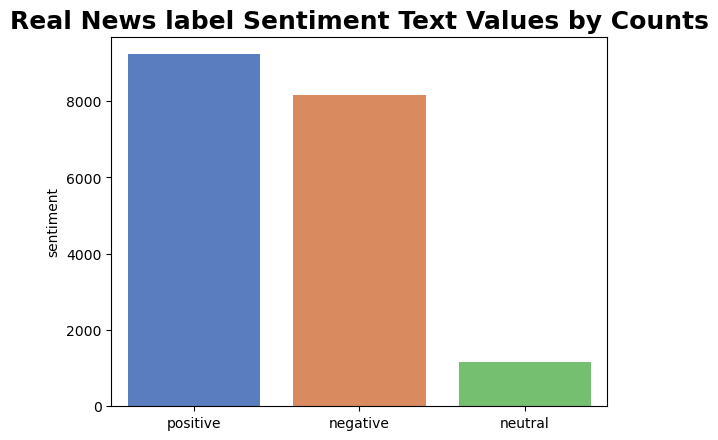

In [1051]:
sns.set_palette('muted')
ax = sns.barplot(x=rn_SA['sentiment'].value_counts().index, y=rn_SA['sentiment'].value_counts())
ax.set_title('Real News label Sentiment Text Values by Counts', fontsize=18, fontweight='bold')

#### Figure 5. Real News label Sentiment Text Values by Counts

From this figure, positive texts (9,229) has the highest quantity for the real news label. Another finding from this figure is that there are more negative texts (8,165) than neutral texts (1,159) in this label. This suggests that the content in the real news dataset tends to convey positive or favorable information. On the other hand, the presence of a significant number of negative texts indicates that there are also instances of negative or unfavorable information being reported in the real news dataset.

## Fake News

The same process as the rn_SA dataframe will be applied to the fn_SA dataframe to perform sentiment analysis on the lemmatized text in the dataframe.

In [1052]:
fn_SA['polarity'] = fn_SA['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))

# Change data structure
fn_SA = pd.concat(
     [fn_SA.drop(['polarity'], axis=1), 
     fn_SA['polarity'].apply(pd.Series)], axis=1)

Each statement's sentiment is categorized based on its compound score.

In [1053]:
fn_SA['sentiment'] = fn_SA['compound'].apply(condition)

fn_SA.tail()

,label,Content,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
23120,1,written by peter van buren venerable new yor...,"[written, peter, van, buren, venerable, new, y...",written peter van buren venerable new york tim...,written peter van buren venerable new york tim...,written peter van buren venerable new york tim...,True,0.069,0.821,0.110,0.9381,positive
23121,1,doj complaint: comey under fire over partisan ...,"[doj, complaint, comey, fire, partisan, witch,...",doj complaint comey fire partisan witch hunt h...,doj complaint comey fire partisan witch hunt h...,doj complaint comey fire partisan witch hunt h...,True,0.109,0.812,0.079,-0.7910,negative
23123,1,julian assange has claimed the hillary clinton...,"[julian, assange, claimed, hillary, clinton, c...",julian assange claimed hillary clinton campaig...,julian assange claimed hillary clinton campaig...,julian assange claimed hillary clinton campaig...,True,0.134,0.728,0.138,0.6355,positive
23125,1,the ‘p’ in pbs should stand for ‘plutocratic’ ...,"[p, pbs, stand, plutocratic, pentagon, posted,...",pbs stand plutocratic pentagon posted oct 2016...,pbs stand plutocratic pentagon posted oct 2016...,pbs stand plutocratic pentagon posted oct 2016...,True,0.180,0.662,0.158,-0.9952,negative
23126,1,anti-trump protesters are tools of the oligar...,"[anti, trump, protesters, tools, oligarchy, re...",anti trump protesters tools oligarchy reform a...,anti trump protesters tools oligarchy reform a...,anti trump protesters tools oligarchy reform a...,True,0.202,0.667,0.131,-0.9981,negative


For the Fake News, it shows that the majority of the statements are categorized as also having positive sentiment, and also with negative sentiments being the second highest and neutral sentiment being the lowest.

In [1054]:
fn_SA['sentiment'].value_counts()

positive    2271
negative    2115
neutral      190
Name: sentiment, dtype: int64

To visualize the distribution for the Fake News label, a [`bar plot`](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=vertical+bar+plots) is generated as well.

Text(0.5, 1.0, 'Fake News label Sentiment Text Values by Counts')

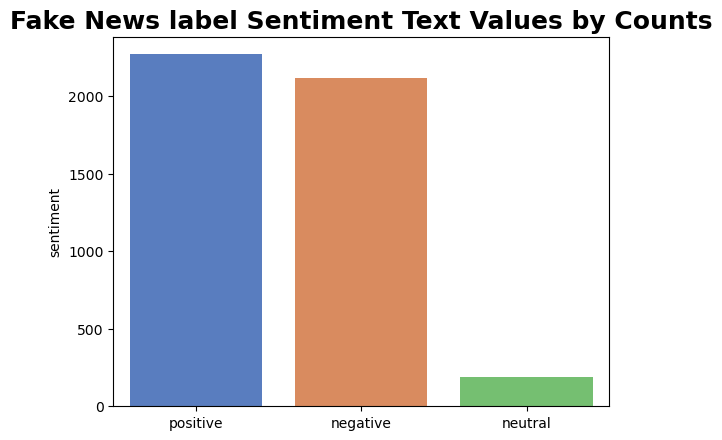

In [1055]:
sns.set_palette('muted')
ax = sns.barplot(x= fn_SA['sentiment'].value_counts().index, y=fn_SA['sentiment'].value_counts())
ax.set_title('Fake News label Sentiment Text Values by Counts', fontsize=18, fontweight='bold')

#### Figure 6. Real News label Sentiment Text Values by Counts

The figure illustrates the distribution of sentiments within the fake news label. It indicates that the majority of statements in the fake news dataset are classified as positive, with a count of 2587 statements. The second-highest sentiment category is negative, with 1734 statements. The smallest category is neutral, comprising only 177 statements. This distribution provides valuable insights into the overall sentiment patterns within the fake news dataset, highlighting the prevalence of positive sentiments and the relatively lower occurrence of neutral sentiments.

The sentiment distribution within the fake news dataset reveals three key implications:
   - a higher count of positive statements suggests that a significant portion of the fake news articles convey a positive or favorable tone, possibly aiming to promote specific narratives and influence readers' perceptions. 
   
   - the considerable number of negative statements indicates that fake news articles also employ negative language to invoke emotional responses and create a sense of urgency. This polarization in sentiment can contribute to the spread of misinformation, as emotionally charged content tends to attract more attention and engagement.
   
  - the relatively lower number of neutral statements further reinforces the notion that fake news often employs polarizing and emotive language to create impact and engagement.

## 4. Among the articles written in Filipino and English, which language predominantly contains the most real or fake news labels?

To answer this question, we would be needing to load the csv files, using [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv) for English news and Filipino news articles.

In [1056]:
df_english_news = pd.read_csv('english_news.csv')
df_english_news.head()

,label,Content
0,0,"MANILA, Philippines – Finally! Best-selling Ja..."
1,0,"MANILA, Philippines – The results of the lates..."
2,0,Tom Brady was the ultimate winner on the field...
3,0,It’s one thing to know what makes people happy...
4,0,Justin Bieber is the latest artist in a growin...


In [1057]:
df_filipino_news = pd.read_csv('filipino_news.csv')
df_filipino_news.head()

,label,Content
0,0,"MANILA, Philippines – Jonathon Simmons carried..."
1,0,"MANILA, Philippines – June Mar Fajardo and Sco..."
2,0,"MANILA, Philippines – Nazareth-NU star guard R..."
3,0,"MANILA, Philippines – San Miguel waxed hot ear..."
4,0,LeBron James moved closer to Kareem Abdul-Jabb...


To count the number of real and fake news labels, we filter the dataframes based on the 'label' column. We then calculate the counts of real and fake news labels using the shape attribute of the filtered dataframes. The shape attribute returns a tuple (rows, columns), so shape[0] gives us the number of rows or the count of real/fake news.

In [1058]:
english_real_count = df_english_news[df_english_news['label'] == 0].shape[0]
english_fake_count = df_english_news[df_english_news['label'] == 1].shape[0]

filipino_real_count = df_filipino_news[df_filipino_news['label'] == 0].shape[0]
filipino_fake_count = df_filipino_news[df_filipino_news['label'] == 1].shape[0]

We then compare the counts for English and Filipino news to determine which language has the most real and fake news labels. We use if-else statements to assign the most frequent language to variables most_real_language and most_fake_language.

In [1059]:
# Compare the counts to determine which language has the most real and fake news labels
if english_real_count > filipino_real_count:
    most_real_language = 'English'
    most_real_count = english_real_count
else:
    most_real_language = 'Filipino'
    most_real_count = filipino_real_count

if english_fake_count > filipino_fake_count:
    most_fake_language = 'English'
    most_fake_count = english_fake_count
else:
    most_fake_language = 'Filipino'
    most_fake_count = filipino_fake_count

# Display the results
print(f"Language with the most Real News: {most_real_language}, Count: {most_real_count}")
print(f"Language with the most Fake News: {most_fake_language}, Count: {most_fake_count}")

Language with the most Real News: English, Count: 14367
Language with the most Fake News: English, Count: 3154


We also create a [`bar plot`](https://seaborn.pydata.org/generated/seaborn.objects.Stack.html?highlight=bar+stack+plot) to visualize this result.

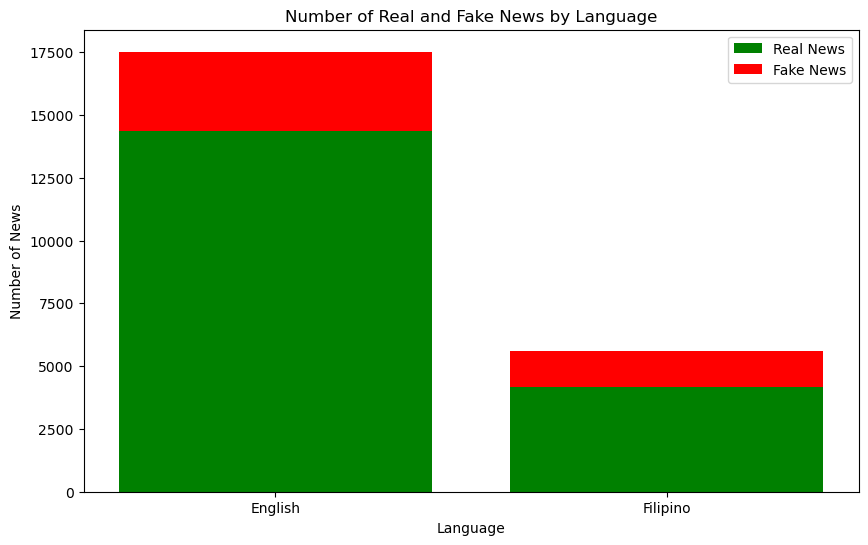

In [1060]:
# bar plot to visualize the counts
languages = ['English', 'Filipino']
real_counts = [english_real_count, filipino_real_count]
fake_counts = [english_fake_count, filipino_fake_count]

plt.figure(figsize=(10, 6))
plt.bar(languages, real_counts, color='green', label='Real News')
plt.bar(languages, fake_counts, bottom=real_counts, color='red', label='Fake News')
plt.xlabel('Language')
plt.ylabel('Number of News')
plt.title('Number of Real and Fake News by Language')
plt.legend()
plt.show()

#### Figure 7. Number of Real and Fake News by Language

Based on the provided counts, English has the highest number of both real and fake news labels. There are 14,419 real news articles and 3,107 fake news articles written in English. However, it's important to note that we have more English articles in the dataset compared to Filipino articles, which may skew the results. 

# Conclusion
After examining the data for Fake and Real news, the initial analysis suggests that we need more data for both categories (Real and Fake). This is evident upon comparing the most common words result from using the TF-IDF method (refer to `Figure 4`) and the most common words result from manually removing unnecessary words and characters from the data such as stopwords, fillers, blank spaces, verbs, and contractions (refer to `Figure 3`). 

The result from the manual exclusion of the unnecessary words and characters on both data per label had listed the most common words under the real label which are: 'people', 'country', 'year', 'time', and 'according'. Meanwhile, the most common words under the fake label are 'trump', 'clinton', 'state', 'people', and 'year'. On the other hand, using the TF-IDF method to identify common words, the top 5 words for the Real label are "tell," "campaign," "percent," "republican," and "republicans." For the Fake label, the top 5 words are "ang," "say," "mga," "trump," and "said." Upon comparing the outcomes of both methods (see `Figure 3` and `Figure 4`), we **no shared frequent words** were found in the <u>Real label from both results</u>. However, for the <u>fake label</u>, only the word **'trump' appeared in both sets of results**. Additionally, as observed in the TF-IDF results, a **mixture of Filipino and English words** were included among the most common words in the Fake label.

Continuing further, when investigating the languages represented within the gathered data, it becomes apparent that we require additional Filipino news articles to establish a meaningful comparison with the English articles. This will enable us to determine which of the two languages is more susceptible to containing fake news data.

As depicted in `Figure 7`, the results indicate that <u>fake news data is more prevalent within the English articles</u>. However, upon closer examination of the collected data from Filipino and English articles, it becomes evident that the **number of English articles is more than three times that of the Filipino articles**. This <u>big difference in numbers means that the comparison not reliable</u>.


# Recommendation
To enhance the accuracy and depth of our analysis regarding the prevalence of fake news in both English and Filipino news articles, we suggest the following:

### 1. Separate Analysis for Different Languages
Conduct separate analysis for news articles written in English and those in Filipino. This will allow us to gain a comprehensive understanding of the distinct patterns and characteristics of fake news propagation in each language.

### 2. Expand Data Collection Efforts:
Increase the volume of collected data, particularly for Filipino news articles and Fake news articles, to ensure a balanced representation for both languages and for both article types. A larger dataset will contribute to more reliable and insightful conclusions. 
#### a. Collect More Filipino Article Data from Filipino News Sites
Collect or specifically web scrape data from news sites that has Filipino news articles or known for releasing news articles written in Filipino.
#### b. Collect from News Sites or Sources known for spreading Fake News
Web scrape news sites such as [`Ako'y Pilipino`](http://akoy-pilipino.blogspot.com/), [`Maharlika News`](https://www.maharlikanews.com/) and more sites known for fake news. Also, try cllecting from social media sources that are also known for posting fake news data. This is to gain different forms of fake news data.

### 3. More In-Depth Analysis on the Article Data:
Undertake a more comprehensive and in-depth analysis by considering the following article information:
#### a. Article Titles and Previews Analysis:
Collect article titles and previews and examine if there are specific patterns that are prevalent in both real and fake news articles. This could involve comparing wording styles or linguistic cues in both real and fake news titles and previews.
#### b. Temporal Analysis:
Collect article dates and investigate when the dissemination of fake news data reached its peak. This analysis may also be correlated with significant events or occurrences during those periods across the globe. Identifying any correlation between fake news spikes and major events can provide valuable insights into the motivations and contexts driving the spread of misinformation.

These recommendations were formulated while aiming to improve the accuracy and depth of our analysis on fake news prevalence in this project. Implementing these recommendation in future projects may contribute to a deeper understanding of how fake news is distributed, along with its potential impacts across different languages and on a national or global scale.

# References

- Casayuran, M. (2023, May 3). *Robin: PH press freedom remains under threat due to disinformation, fake news*. Manila Bulletin. https://mb.com.ph/2023/5/2/robin-ph-press-freedom-remains-under-threat-due-to-disinformation-fake-news
- Gregorio,  Xave . (2022, October 11). *For Filipinos, fake news is a problem they blame on social media influencers*. Philstar. https://www.philstar.com/headlines/2022/10/11/2215867/filipinos-fake-news-problem-they-blame-social-media-influencers/amp/
- Lalu, G. P. (2022, October 11). *‘Fake news’ a problem in PH? 9 in 10 Filipinos agree, says Pulse Asia*. INQUIRER.Net. https://newsinfo.inquirer.net/1678248/fake-news-a-problem-in-ph-9-in-10-filipinos-agree-says-pulse-asia/amp
- Sharanya. (2021). *Fake news detection*. Kaggle. https://www.kaggle.com/code/sharanya02/fake-news-detection
- Siar, S. (2021, August). *Fake news, its dangers, and how we can fight it*. https://;https://pidswebs.pids.gov.ph/CDN/PUBLICATIONS/pidspn2106.pdf